In [63]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv("C:/Users/Heet Gorakhitya/Downloads/sonar.csv")
#df.head()
X = df[df.columns[0:60]].values
y = df[df.columns[60]]

In [65]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [66]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)
Y


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [68]:
def read_dataset():
    df = pd.read_csv("C:/Users/Heet Gorakhitya/Downloads/sonar.csv")
    X = df[df.columns[0:60]].values
    y = df[df.columns[60]]
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)    
    return (X, Y)

In [74]:
X, Y = read_dataset()
X, Y = shuffle(X, Y, random_state=1)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state=415)
print(train_x.shape)
print(train_y.shape)
print(train_y[100][1])

(165, 60)
(165, 2)
1.0


In [75]:
learning_rate = 0.3
epochs = 1000
cost_history = np.empty(shape=[1], dtype=float)
n_dims = X.shape[1]
classes = 2
model_path = "C:/Users/Heet Gorakhitya/Desktop"

In [76]:
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

In [77]:
#n_dim = X.shape[1]
#n_dim
x = tf.placeholder(tf.float32, [None, n_dims])
W = tf.Variable(tf.zeros([n_dims, classes]))
b = tf.Variable(tf.zeros([classes]))
y_ = tf.placeholder(tf.float32, [None, classes])

In [78]:
def multilayer_perceptron(x, weights, biases):
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)

    out_layer = tf.add(tf.matmul(layer_4, weights['out']), biases['out'])
    
    return out_layer

In [79]:
weights = {
    
    'h1': tf.Variable(tf.truncated_normal([n_dims, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, classes])),
}

biases = {
    
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([classes])),
}

In [80]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
y = multilayer_perceptron(x, weights, biases)
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
#training_step

In [85]:
sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

for epoch in range(epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = sess.run(accuracy, feed_dict={x: train_x, y_: train_y})
    accuracy_history.append(accuracy)
    print("Epoch: ", epoch, "-", "Cost: ", cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)

save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)

Epoch:  0 - Cost:  239.31018  - MSE:  47711.93464233927 - Train Accuracy:  0.45454547
Epoch:  1 - Cost:  1.9997829  - MSE:  19.284789978863465 - Train Accuracy:  0.54545456
Epoch:  2 - Cost:  35.65419  - MSE:  1055.1204404743673 - Train Accuracy:  0.45454547
Epoch:  3 - Cost:  4.6122518  - MSE:  41.50482264220794 - Train Accuracy:  0.54545456
Epoch:  4 - Cost:  1.119775  - MSE:  1.0552326449814107 - Train Accuracy:  0.45454547
Epoch:  5 - Cost:  0.8265998  - MSE:  1.4549185329954728 - Train Accuracy:  0.45454547
Epoch:  6 - Cost:  0.78324  - MSE:  1.2586927724923016 - Train Accuracy:  0.45454547
Epoch:  7 - Cost:  0.747087  - MSE:  0.9604832636846199 - Train Accuracy:  0.45454547
Epoch:  8 - Cost:  0.71560395  - MSE:  0.6515838560483419 - Train Accuracy:  0.45454547
Epoch:  9 - Cost:  0.69150287  - MSE:  0.418107188991777 - Train Accuracy:  0.46060607
Epoch:  10 - Cost:  0.6788793  - MSE:  0.30963918540609525 - Train Accuracy:  0.6606061
Epoch:  11 - Cost:  0.6751417  - MSE:  0.2857486

Epoch:  94 - Cost:  0.64803493  - MSE:  1.8913542884130214 - Train Accuracy:  0.6242424
Epoch:  95 - Cost:  0.6543096  - MSE:  3.2815927191893204 - Train Accuracy:  0.53333336
Epoch:  96 - Cost:  0.7008085  - MSE:  1.7487822180154862 - Train Accuracy:  0.54545456
Epoch:  97 - Cost:  0.6417286  - MSE:  1.9162027621082192 - Train Accuracy:  0.6424242
Epoch:  98 - Cost:  0.65317225  - MSE:  3.294768795553991 - Train Accuracy:  0.55757576
Epoch:  99 - Cost:  0.6977649  - MSE:  1.7527198357942293 - Train Accuracy:  0.54545456
Epoch:  100 - Cost:  0.63655925  - MSE:  1.9427260817526981 - Train Accuracy:  0.6424242
Epoch:  101 - Cost:  0.6342123  - MSE:  3.058150441964017 - Train Accuracy:  0.6424242
Epoch:  102 - Cost:  0.67755353  - MSE:  1.8082400946080235 - Train Accuracy:  0.58181816
Epoch:  103 - Cost:  0.61017126  - MSE:  2.6287000634987523 - Train Accuracy:  0.6545454
Epoch:  104 - Cost:  0.6202824  - MSE:  2.071314773409035 - Train Accuracy:  0.7151515
Epoch:  105 - Cost:  0.63109726

Epoch:  187 - Cost:  0.6890093  - MSE:  1.6191520278017546 - Train Accuracy:  0.54545456
Epoch:  188 - Cost:  0.68900925  - MSE:  1.619150179099692 - Train Accuracy:  0.54545456
Epoch:  189 - Cost:  0.68900913  - MSE:  1.6191486773959483 - Train Accuracy:  0.54545456
Epoch:  190 - Cost:  0.6890093  - MSE:  1.6191473400599554 - Train Accuracy:  0.54545456
Epoch:  191 - Cost:  0.68900925  - MSE:  1.6191461985167237 - Train Accuracy:  0.54545456
Epoch:  192 - Cost:  0.689009  - MSE:  1.619145230984275 - Train Accuracy:  0.54545456
Epoch:  193 - Cost:  0.6890093  - MSE:  1.6191444048213433 - Train Accuracy:  0.54545456
Epoch:  194 - Cost:  0.689009  - MSE:  1.6191436982671874 - Train Accuracy:  0.54545456
Epoch:  195 - Cost:  0.6890092  - MSE:  1.619143100437116 - Train Accuracy:  0.54545456
Epoch:  196 - Cost:  0.6890092  - MSE:  1.6191425895811804 - Train Accuracy:  0.54545456
Epoch:  197 - Cost:  0.6890091  - MSE:  1.6191421548225335 - Train Accuracy:  0.54545456
Epoch:  198 - Cost:  0.

Epoch:  280 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  281 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  282 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  283 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  284 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  285 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  286 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  287 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  288 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  289 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  290 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  291 - Cost:  

Epoch:  373 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  374 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  375 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  376 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  377 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  378 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  379 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  380 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  381 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  382 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  383 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  384 - Cost:  

Epoch:  466 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  467 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  468 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  469 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  470 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  471 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  472 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  473 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  474 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  475 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  476 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  477 - Cost:  

Epoch:  559 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  560 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  561 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  562 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  563 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  564 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  565 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  566 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  567 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  568 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  569 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  570 - Cost:  

Epoch:  652 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  653 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  654 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  655 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  656 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  657 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  658 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  659 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  660 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  661 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  662 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  663 - Cost:  

Epoch:  745 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  746 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  747 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  748 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  749 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  750 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  751 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  752 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  753 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  754 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  755 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  756 - Cost:  

Epoch:  838 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  839 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  840 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  841 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  842 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  843 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  844 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  845 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  846 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  847 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  848 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  849 - Cost:  

Epoch:  931 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  932 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  933 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  934 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  935 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  936 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  937 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  938 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  939 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  940 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  941 - Cost:  0.6890095  - MSE:  1.6191396671535052 - Train Accuracy:  0.54545456
Epoch:  942 - Cost:  

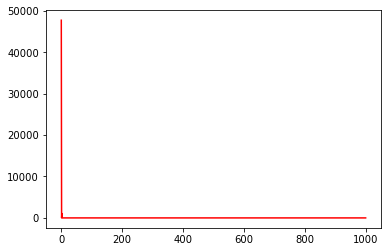

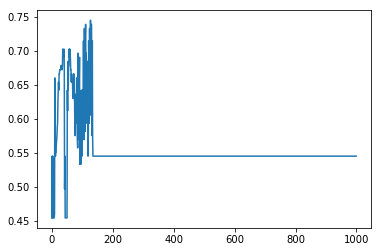

In [86]:
plt.plot(mse_history, "r")
plt.show()
plt.plot(accuracy_history)
plt.show()

In [84]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

Test Accuracy:  0.5
MSE: 2.1640
